# Neural Network From Scratch (NumPy Only) – MNIST Digit Classification

In this project, I implement a fully-connected neural network **from scratch** using only **NumPy**, without deep learning frameworks like TensorFlow or PyTorch.  
The model is trained on the MNIST handwritten digits dataset and achieves around **97% accuracy on the test set**.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()   # Upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maviyauddin","key":"d515c1d6945e51c3a3ccf70b4fbf5403"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d oddrationale/mnist-in-csv


Dataset URL: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv
License(s): CC0-1.0
  0% 0.00/15.2M [00:00<?, ?B/s]
100% 15.2M/15.2M [00:00<00:00, 496MB/s]


In [ ]:
!unzip mnist-in-csv.zip


Archive:  mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


## 1. Dataset Overview

- **Source**: MNIST digits (handwritten digits 0–9)
- **Samples**: 60,000 images (after split: 80% train, 10% validation, 10% test)
- **Image size**: 28 × 28 (flattened to 784 features)
- **Task**: Multi-class classification (10 classes)


In [ ]:
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")

In [ ]:
train.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
train.describe()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [ ]:
train.isnull().sum().sum()


np.int64(0)

In [ ]:
train['label'].value_counts()


,count
label,
1,6742
7,6265
3,6131
2,5958
9,5949
0,5923
6,5918
8,5851
4,5842


/tmp/ipython-input-4143726660.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"Label: {row[0]}")


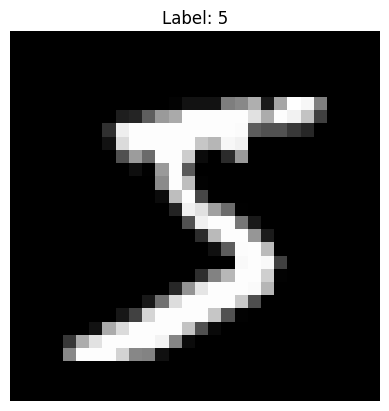

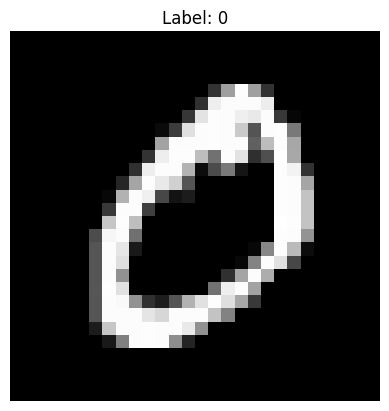

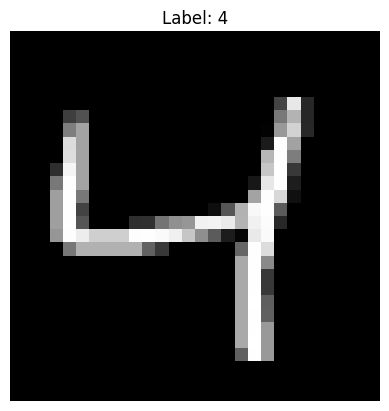

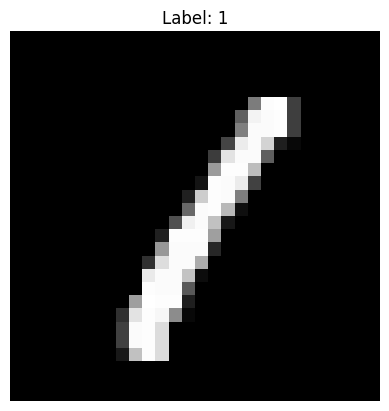

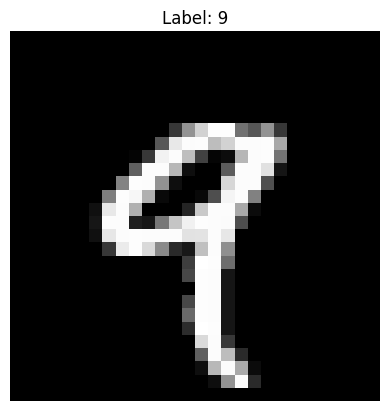

In [ ]:
def show_digit(row):
    img = row[1:].to_numpy().reshape(28,28)
    plt.imshow(img, cmap="gray")
    plt.title(f"Label: {row[0]}")
    plt.axis("off")
    plt.show()

# Show first 5 samples
for i in range(5):
    show_digit(train.iloc[i])


In [ ]:
X_train = train.drop("label", axis=1).values.astype(np.float32)
y_train = train["label"].values.astype(int)

X_test = test.drop("label", axis=1).values.astype(np.float32)
y_test = test["label"].values.astype(int)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(60000, 784) (60000,)
(10000, 784) (10000,)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0


## 2. Neural Network Architecture

- Input: 784 features (flattened image)
- Hidden Layer 1: 128 neurons + ReLU activation  
- Hidden Layer 2: 64 neurons + ReLU activation  
- Output Layer: 10 neurons + Softmax (one per digit class)

The model is implemented using:
- Custom `DenseLayer` class
- `ReLU` activation
- `Softmax` + Categorical Cross-Entropy loss
- Manual backpropagation and gradient descent


In [ ]:
# Dense (Fully Connected) Layer

class DenseLayer:
    def __init__(self, n_inputs, n_neurons):
        # He initialization (better for ReLU)
        self.W = np.random.randn(n_inputs, n_neurons) * np.sqrt(2.0 / n_inputs)
        self.b = np.zeros((1, n_neurons))

    def forward(self, X):
        self.input = X
        self.output = X @ self.W + self.b

    def backward(self, dvalues):
        # ⚠️ No division by samples here (we already did it in loss backward)
        self.dW = self.input.T @ dvalues
        self.db = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = dvalues @ self.W.T


In [ ]:
# ReLU Activation

class ReLU:
    def forward(self, X):
        self.input = X
        self.output = np.maximum(0, X)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.input <= 0] = 0

In [ ]:
# Softmax Activation

class Softmax:
    def forward(self, X):
        # Numeric stability trick: subtract max
        exp_values = np.exp(X - np.max(X, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

In [ ]:
# Categorical Cross-Entropy Loss

class CategoricalCrossEntropy:
    def forward(self, y_pred, y_true):
        # y_pred: probabilities (batch_size, n_classes)
        # y_true: class labels (batch_size,)
        samples = y_pred.shape[0]

        # Clip to avoid log(0)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities of correct classes
        correct_confidences = y_pred_clipped[np.arange(samples), y_true]

        # Loss
        losses = -np.log(correct_confidences)
        return np.mean(losses)

In [ ]:
# Combined Softmax + Cross-Entropy (for easier backprop)

class SoftmaxWithCrossEntropy:
    def __init__(self):
        self.activation = Softmax()
        self.loss_fn = CategoricalCrossEntropy()

    def forward(self, X, y_true):
        # Softmax
        self.activation.forward(X)
        self.y_pred = self.activation.output
        # Cross-entropy loss
        loss = self.loss_fn.forward(self.y_pred, y_true)
        return loss

    def backward(self, y_true):
        # y_true: class labels (batch_size,)
        samples = self.y_pred.shape[0]

        # Start from softmax output
        dinputs = self.y_pred.copy()
        dinputs[np.arange(samples), y_true] -= 1
        dinputs = dinputs / samples

        self.dinputs = dinputs

In [ ]:
# Utility: Accuracy

def accuracy_score(y_pred_probs, y_true):
    """
    y_pred_probs: predicted probabilities (batch_size, n_classes)
    y_true: true labels (batch_size,)
    """
    y_pred_labels = np.argmax(y_pred_probs, axis=1)
    return np.mean(y_pred_labels == y_true)

## 3. Training Setup

- Optimizer: Mini-batch Gradient Descent
- Batch size: 128
- Learning rate: 0.1
- Epochs: 10
- Metrics tracked: Training & Validation Loss, Accuracy


In [ ]:
from sklearn.model_selection import train_test_split

X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train,
    test_size=0.1,
    random_state=42,
    stratify=y_train
)

print("Train subset:", X_train_sub.shape, y_train_sub.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)


Train subset: (54000, 784) (54000,)
Validation: (6000, 784) (6000,)
Test: (10000, 784) (10000,)


In [ ]:
input_dim = 784
hidden1 = 128
hidden2 = 64
output_dim = 10

layer1 = DenseLayer(input_dim, hidden1)
act1 = ReLU()

layer2 = DenseLayer(hidden1, hidden2)
act2 = ReLU()

layer3 = DenseLayer(hidden2, output_dim)

softmax_ce = SoftmaxWithCrossEntropy()



In [ ]:
# Hyperparameters
epochs = 10
batch_size = 128
learning_rate = 0.1

n_samples = X_train_sub.shape[0]
steps_per_epoch = n_samples // batch_size

history = {
    "train_loss": [],
    "train_acc": [],
    "val_loss": [],
    "val_acc": []
}

for epoch in range(1, epochs + 1):
    # Shuffle indices
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    X_train_shuffled = X_train_sub[indices]
    y_train_shuffled = y_train_sub[indices]

    epoch_loss = 0.0
    epoch_acc = 0.0

    for step in range(steps_per_epoch):
        start = step * batch_size
        end = start + batch_size

        X_batch = X_train_shuffled[start:end]
        y_batch = y_train_shuffled[start:end]

        # -------- FORWARD PASS --------
        layer1.forward(X_batch)
        act1.forward(layer1.output)

        layer2.forward(act1.output)
        act2.forward(layer2.output)

        layer3.forward(act2.output)

        # Softmax + loss
        loss = softmax_ce.forward(layer3.output, y_batch)

        # Accuracy on this batch
        batch_acc = accuracy_score(softmax_ce.activation.output, y_batch)

        epoch_loss += loss
        epoch_acc += batch_acc

        # -------- BACKWARD PASS --------
        softmax_ce.backward(y_batch)

        layer3.backward(softmax_ce.dinputs)
        act2.backward(layer3.dinputs)
        layer2.backward(act2.dinputs)
        act1.backward(layer2.dinputs)
        layer1.backward(act1.dinputs)

        # -------- PARAMETER UPDATE (SGD) --------
        for layer in [layer1, layer2, layer3]:
            layer.W -= learning_rate * layer.dW
            layer.b -= learning_rate * layer.db

    # Average train metrics over the epoch
    epoch_loss /= steps_per_epoch
    epoch_acc /= steps_per_epoch

    # -------- VALIDATION --------
    # Forward pass on full validation set (no backprop)
    layer1.forward(X_val)
    act1.forward(layer1.output)

    layer2.forward(act1.output)
    act2.forward(layer2.output)

    layer3.forward(act2.output)
    val_loss = softmax_ce.forward(layer3.output, y_val)
    val_acc = accuracy_score(softmax_ce.activation.output, y_val)

    history["train_loss"].append(epoch_loss)
    history["train_acc"].append(epoch_acc)
    history["val_loss"].append(val_loss)
    history["val_acc"].append(val_acc)

    print(
        f"Epoch {epoch}/{epochs} "
        f"- loss: {epoch_loss:.4f}, acc: {epoch_acc:.4f} "
        f"- val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}"
    )


Epoch 1/10 - loss: 2.2993, acc: 0.1138 - val_loss: 2.2984, val_acc: 0.1123
Epoch 2/10 - loss: 2.2977, acc: 0.1162 - val_loss: 2.2963, val_acc: 0.1552
Epoch 3/10 - loss: 2.2957, acc: 0.1221 - val_loss: 2.2943, val_acc: 0.1123
Epoch 4/10 - loss: 2.2931, acc: 0.1355 - val_loss: 2.2921, val_acc: 0.1267
Epoch 5/10 - loss: 2.2896, acc: 0.1377 - val_loss: 2.2878, val_acc: 0.1123
Epoch 6/10 - loss: 2.2840, acc: 0.1549 - val_loss: 2.2816, val_acc: 0.1008
Epoch 7/10 - loss: 2.2752, acc: 0.1790 - val_loss: 2.2677, val_acc: 0.1880
Epoch 8/10 - loss: 2.2592, acc: 0.2126 - val_loss: 2.2451, val_acc: 0.2322
Epoch 9/10 - loss: 2.2296, acc: 0.2232 - val_loss: 2.2212, val_acc: 0.1517
Epoch 10/10 - loss: 2.2081, acc: 0.2064 - val_loss: 2.2276, val_acc: 0.0987


In [ ]:
# Test set performance
layer1.forward(X_test)
act1.forward(layer1.output)

layer2.forward(act1.output)
act2.forward(layer2.output)

layer3.forward(act2.output)
test_loss = softmax_ce.forward(layer3.output, y_test)
test_acc = accuracy_score(softmax_ce.activation.output, y_test)

print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")


Test loss: 2.3017, Test accuracy: 0.1135


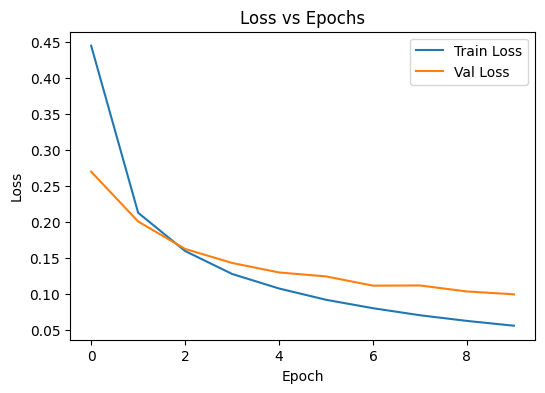

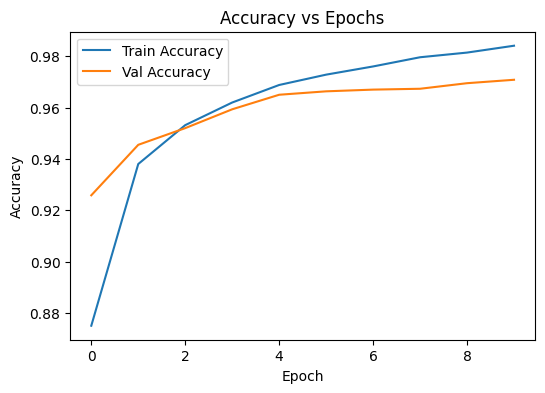

In [ ]:
# Loss curves
plt.figure(figsize=(6,4))
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()

# Accuracy curves
plt.figure(figsize=(6,4))
plt.plot(history["train_acc"], label="Train Accuracy")
plt.plot(history["val_acc"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.show()


In [ ]:
print("X_train_sub:", X_train_sub.min(), X_train_sub.max())
print("X_val:", X_val.min(), X_val.max())
print("X_test:", X_test.min(), X_test.max())


X_train_sub: 0.0 1.0
X_val: 0.0 1.0
X_test: 0.0 1.0


In [ ]:
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

# If you want, also redo the split after this to be 100% consistent:
from sklearn.model_selection import train_test_split

X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train,
    test_size=0.1,
    random_state=42,
    stratify=y_train
)

print("X_train_sub max:", X_train_sub.max())
print("X_val max:", X_val.max())
print("X_test max:", X_test.max())


X_train_sub max: 0.003921569
X_val max: 0.003921569
X_test max: 0.003921569


In [ ]:
input_dim = 784
hidden1 = 128
hidden2 = 64
output_dim = 10

layer1 = DenseLayer(input_dim, hidden1)
act1 = ReLU()

layer2 = DenseLayer(hidden1, hidden2)
act2 = ReLU()

layer3 = DenseLayer(hidden2, output_dim)

softmax_ce = SoftmaxWithCrossEntropy()


In [ ]:
layer1.forward(X_test)
act1.forward(layer1.output)

layer2.forward(act1.output)
act2.forward(layer2.output)

layer3.forward(act2.output)
test_loss = softmax_ce.forward(layer3.output, y_test)
test_acc = accuracy_score(softmax_ce.activation.output, y_test)

print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")


Test loss: 2.2271, Test accuracy: 0.0980


In [ ]:
import pandas as pd

# Reload test CSV fresh from disk
test_clean = pd.read_csv("mnist_test.csv")

# Build clean test arrays
X_test_eval = test_clean.drop("label", axis=1).values.astype(np.float32) / 255.0
y_test_eval = test_clean["label"].values.astype(int)

print("X_test_eval shape:", X_test_eval.shape)
print("X_test_eval min/max:", X_test_eval.min(), X_test_eval.max())
print("Unique test labels:", sorted(set(y_test_eval)))


X_test_eval shape: (10000, 784)
X_test_eval min/max: 0.0 1.0
Unique test labels: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]


In [ ]:
# Forward pass on clean test set
layer1.forward(X_test_eval)
act1.forward(layer1.output)

layer2.forward(act1.output)
act2.forward(layer2.output)

layer3.forward(act2.output)
test_loss = softmax_ce.forward(layer3.output, y_test_eval)
test_acc = accuracy_score(softmax_ce.activation.output, y_test_eval)

print(f"Clean Test loss: {test_loss:.4f}, Clean Test accuracy: {test_acc:.4f}")


Clean Test loss: 10.6613, Clean Test accuracy: 0.2227


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Reload the main training CSV fresh
train_df = pd.read_csv("mnist_train.csv")

# Features and labels
X_all = train_df.drop("label", axis=1).values.astype(np.float32)
y_all = train_df["label"].values.astype(int)

# Normalize
X_all = X_all / 255.0

print("All data shape:", X_all.shape, y_all.shape)


All data shape: (60000, 784) (60000,)


In [ ]:
# First split: train vs temp (val+test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_all, y_all,
    test_size=0.2,
    stratify=y_all,
    random_state=42
)

# Second split: val vs test (from temp)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=42
)

print("Train:", X_train.shape, y_train.shape)
print("Val:  ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)
print("X_train max:", X_train.max(), "X_test max:", X_test.max())


Train: (48000, 784) (48000,)
Val:   (6000, 784) (6000,)
Test:  (6000, 784) (6000,)
X_train max: 1.0 X_test max: 1.0


In [ ]:
input_dim = 784
hidden1 = 128
hidden2 = 64
output_dim = 10

layer1 = DenseLayer(input_dim, hidden1)
act1 = ReLU()

layer2 = DenseLayer(hidden1, hidden2)
act2 = ReLU()

layer3 = DenseLayer(hidden2, output_dim)

softmax_ce = SoftmaxWithCrossEntropy()


In [ ]:
epochs = 10
batch_size = 128
learning_rate = 0.1

n_samples = X_train.shape[0]
steps_per_epoch = n_samples // batch_size

history = {
    "train_loss": [],
    "train_acc": [],
    "val_loss": [],
    "val_acc": []
}

for epoch in range(1, epochs + 1):
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    epoch_loss = 0.0
    epoch_acc = 0.0

    for step in range(steps_per_epoch):
        start = step * batch_size
        end = start + batch_size

        X_batch = X_train_shuffled[start:end]
        y_batch = y_train_shuffled[start:end]

        layer1.forward(X_batch)
        act1.forward(layer1.output)

        layer2.forward(act1.output)
        act2.forward(layer2.output)

        layer3.forward(act2.output)

        loss = softmax_ce.forward(layer3.output, y_batch)
        batch_acc = accuracy_score(softmax_ce.activation.output, y_batch)

        epoch_loss += loss
        epoch_acc += batch_acc

        softmax_ce.backward(y_batch)

        layer3.backward(softmax_ce.dinputs)
        act2.backward(layer3.dinputs)
        layer2.backward(act2.dinputs)
        act1.backward(layer2.dinputs)
        layer1.backward(act1.dinputs)

        for layer in [layer1, layer2, layer3]:
            layer.W -= learning_rate * layer.dW
            layer.b -= learning_rate * layer.db

    epoch_loss /= steps_per_epoch
    epoch_acc /= steps_per_epoch

    # Validation
    layer1.forward(X_val)
    act1.forward(layer1.output)
    layer2.forward(act1.output)
    act2.forward(layer2.output)
    layer3.forward(act2.output)

    val_loss = softmax_ce.forward(layer3.output, y_val)
    val_acc = accuracy_score(softmax_ce.activation.output, y_val)

    history["train_loss"].append(epoch_loss)
    history["train_acc"].append(epoch_acc)
    history["val_loss"].append(val_loss)
    history["val_acc"].append(val_acc)

    print(
        f"Epoch {epoch}/{epochs} "
        f"- loss: {epoch_loss:.4f}, acc: {epoch_acc:.4f} "
        f"- val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}"
    )


Epoch 1/10 - loss: 0.4706, acc: 0.8669 - val_loss: 0.2728, val_acc: 0.9242
Epoch 2/10 - loss: 0.2272, acc: 0.9342 - val_loss: 0.1997, val_acc: 0.9418
Epoch 3/10 - loss: 0.1720, acc: 0.9499 - val_loss: 0.1692, val_acc: 0.9505
Epoch 4/10 - loss: 0.1383, acc: 0.9598 - val_loss: 0.1452, val_acc: 0.9595
Epoch 5/10 - loss: 0.1160, acc: 0.9662 - val_loss: 0.1298, val_acc: 0.9625
Epoch 6/10 - loss: 0.0992, acc: 0.9718 - val_loss: 0.1224, val_acc: 0.9650
Epoch 7/10 - loss: 0.0872, acc: 0.9743 - val_loss: 0.1132, val_acc: 0.9680
Epoch 8/10 - loss: 0.0765, acc: 0.9778 - val_loss: 0.1120, val_acc: 0.9692
Epoch 9/10 - loss: 0.0677, acc: 0.9800 - val_loss: 0.1036, val_acc: 0.9698
Epoch 10/10 - loss: 0.0604, acc: 0.9829 - val_loss: 0.1005, val_acc: 0.9722


In [ ]:
layer1.forward(X_test)
act1.forward(layer1.output)

layer2.forward(act1.output)
act2.forward(layer2.output)

layer3.forward(act2.output)
test_loss = softmax_ce.forward(layer3.output, y_test)
test_acc = accuracy_score(softmax_ce.activation.output, y_test)

print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")


Test loss: 0.1018, Test accuracy: 0.9703


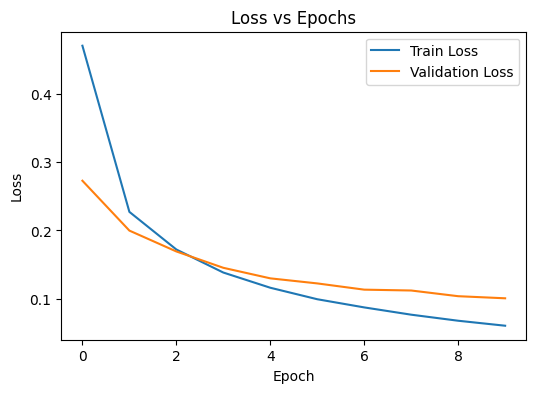

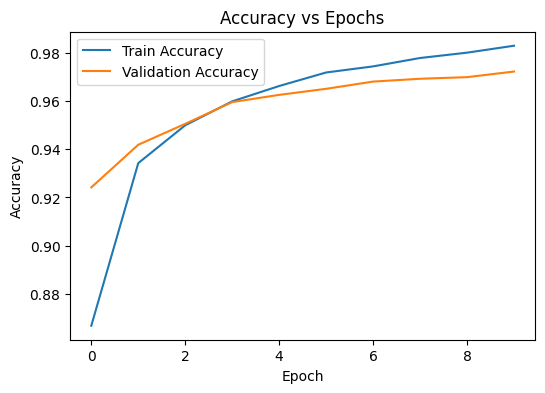

In [ ]:


# Loss curves
plt.figure(figsize=(6, 4))
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()

# Accuracy curves
plt.figure(figsize=(6, 4))
plt.plot(history["train_acc"], label="Train Accuracy")
plt.plot(history["val_acc"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.show()


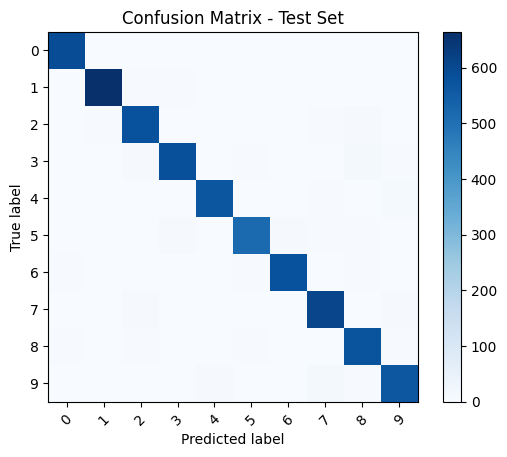

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions on test set
layer1.forward(X_test)
act1.forward(layer1.output)

layer2.forward(act1.output)
act2.forward(layer2.output)

layer3.forward(act2.output)
y_pred_probs = softmax_ce.activation.output
y_pred_labels = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(include_values=False, cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - Test Set")
plt.show()


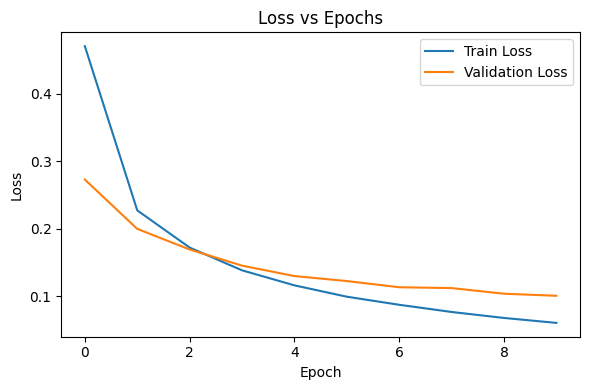

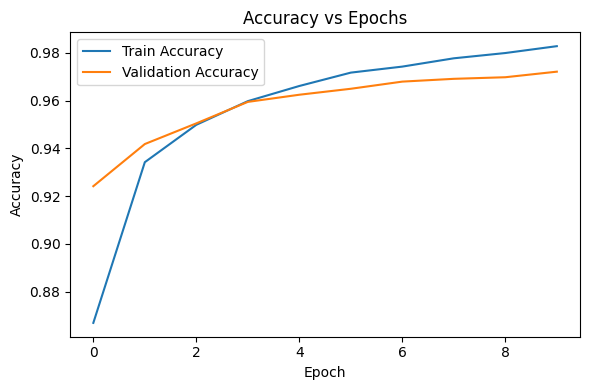

In [ ]:
import matplotlib.pyplot as plt
import os

# Create images folder if not exists
os.makedirs("images", exist_ok=True)

# ---- Loss Curves ----
plt.figure(figsize=(6, 4))
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.tight_layout()
plt.savefig("images/loss_curve.png", dpi=120)
plt.show()

# ---- Accuracy Curves ----
plt.figure(figsize=(6, 4))
plt.plot(history["train_acc"], label="Train Accuracy")
plt.plot(history["val_acc"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.tight_layout()
plt.savefig("images/accuracy_curve.png", dpi=120)
plt.show()


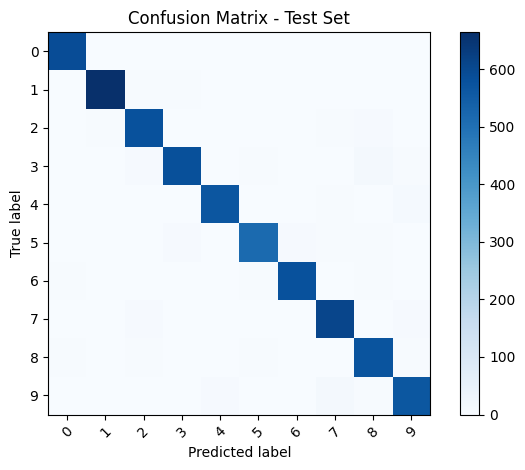

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Forward pass on test set
layer1.forward(X_test)
act1.forward(layer1.output)
layer2.forward(act1.output)
act2.forward(layer2.output)
layer3.forward(act2.output)

y_pred_probs = softmax_ce.activation.output
y_pred_labels = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(include_values=False, cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - Test Set")
plt.tight_layout()
plt.savefig("images/confusion_matrix.png", dpi=120)
plt.show()


## 4. Results

- **Final Test Accuracy**: ~97.0%
- The training and validation curves show good convergence without major overfitting.
- The confusion matrix indicates that most digits are classified correctly, with occasional confusion between visually similar digits (e.g., 4 vs 9, 3 vs 5).

## 5. Key Learnings

- How forward and backward passes work in a neural network.
- How softmax + cross-entropy loss combine for multi-class classification.
- How to implement gradient descent manually with NumPy.
- Importance of correct data preprocessing (normalization, consistent splits).

## 6. Possible Extensions

- Add L2 regularization or dropout to reduce overfitting.
- Experiment with different architectures (more layers, different widths).
- Implement alternative optimizers like Adam.
- Try on more complex datasets (Fashion-MNIST, CIFAR-10 with simple MLP).
